In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
def get_X_train_test(train_data, test_data):
    cols_to_keep = [
        'Pclass',
        'Sex',
        'SibSp',
        'Parch',]
    X_train = train_data[cols_to_keep]
    X_test = test_data[cols_to_keep]
    return X_train, X_test, cols_to_keep

In [4]:
columns_to_encode = ['Sex']

In [5]:
def label_encoder(X_train, X_test):
    X_train = X_train.copy()
    X_test = X_test.copy()
    
    for col in columns_to_encode:
        le = LabelEncoder().fit(X_train[col].astype(str))
        X_train[col] = le.transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))
    return X_train, X_test

In [6]:
def fill_na(df):
    for col in list(df):
        if df[col].isna().any():
            df[col] = df[col].fillna(0)

In [7]:
def normalize(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [8]:
def apply_preprocessing(train_data, test_data):
    y_train = train_data['Survived']
    if 'Survived' in list(test_data):
        y_test = test_data['Survived']
    else:
        y_test_data = pd.read_csv("gender_submission.csv")
        y_test = y_test_data['Survived']
        
    X_train, X_test, features = get_X_train_test(train_data, test_data)
    X_train, X_test = label_encoder(X_train, X_test)
    
    fill_na(X_train)
    fill_na(X_test)
    
    X_train_scaled, X_test_scaled = normalize(X_train, X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, features

In [9]:
X_train_scaled, X_test_scaled, y_train, y_test, features = apply_preprocessing(train_data, test_data)

In [10]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train_scaled, y_train)
y_predict = clf.predict(X_test_scaled)

In [11]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_predict})
output.to_csv('submission.csv', index = False)

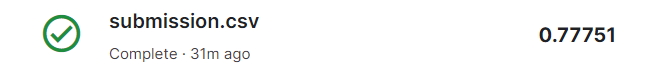